## Анализ данных 

In [26]:
# pip install pyarrow
!pip install polars

  Using cached polars-1.12.0-cp39-abi3-macosx_10_12_x86_64.whl.metadata (14 kB)
Using cached polars-1.12.0-cp39-abi3-macosx_10_12_x86_64.whl (32.9 MB)


In [19]:
# import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# df = pl.read_csv("air_weather_data.csv")
scanner = pl.scan_csv("air_weather_data.csv")
df = scanner.slice(0, 100000).collect()
# scanner.close()

In [11]:
df.head()

date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_id,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,formaldehyde,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,forest area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,i64,f64,str,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
"""2020-01-01 00:00:00+00:00""",0.8865,95.071594,0.1,0.07,0.02,976.3723,100.0,19.453327,321.009,2020,1,1,1,0,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,3.3,2.5,157.0,null,3.1,0.5,53.0,null,null,null,null,null,null,21.199999,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 01:00:00+00:00""",0.6865,94.03446,0.1,0.07,0.02,977.53326,86.0,20.140705,335.72556,2020,1,1,1,1,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,3.0,2.9,148.0,null,1.9,0.2,50.0,null,null,null,null,null,null,20.0,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 02:00:00+00:00""",0.6365,92.338,0.0,0.07,0.03,978.99963,93.0,22.314194,342.1496,2020,1,1,1,2,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,2.8,2.2,148.0,null,1.4,0.1,47.0,null,null,null,null,null,null,18.8,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 03:00:00+00:00""",0.5865,92.67174,0.0,0.07,0.03,980.26953,99.0,21.862406,342.75845,2020,1,1,1,3,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,1.4,1.3,144.0,null,1.6,0.3,52.0,null,null,null,null,null,null,8.325,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 04:00:00+00:00""",-0.0635,90.28776,0.0,0.07,0.03,982.0833,100.0,25.045238,341.56494,2020,1,1,1,4,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,2.4,1.1,141.0,null,0.9,0.3,60.0,null,null,null,null,null,null,null,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76


In [12]:
df.describe()

statistic,date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_id,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,formaldehyde,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,forest area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,"""0""",100000.0,100000.0,100000.0,"""30541""","""41098""","""45037""","""17400""","""37597""","""52357""",99862.0,"""47278""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"""0""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""100000""",0.0,0.0,0.0,"""69459""","""58902""","""54963""","""82600""","""62403""","""47643""",138.0,"""52722""",0.0,0.0,0.0,0.0,0.0,0.0,"""100000""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,6.217948,77.259518,0.063019,0.014271,0.082597,995.551825,72.6857,13.33257,204.914717,2020.47296,2.468,6.39416,15.71936,11.49936,455428.68664,null,null,56.911585,36.105604,7.19016,5.742574,159.61161,null,3.616921,0.99698,53.56449,null,null,null,null,null,null,22.789007,null,0.050048,0.186756,587.460848,643.0776,76377.07776,49.912176,null,11.396904,212.65392,75.422752,1.2272e6,28789.0984,403.132278,1145.06776,22172.619526,15.97944,5814.150943,1557.791622
"""std""",null,10.379558,16.0066,0.283592,0.068683,0.155756,10.635741,35.45323,5.881374,89.087371,0.499271,1.120727,3.461912,8.795759,6.922098,4103.269703,null,null,1.265902,2.767578,5.809431,4.427009,36.594564,null,3.862869,1.397462,15.779825,null,null,null,null,null,null,6.815149,null,0.317786,0.49246,214.600634,45.631353,16961.861751,157.90423,null,0.665102,107.144928,1.78705,57455.528191,3492.926785,4.005876,188.529654,1893.538898,2.106566,1260.578318,668.998909
"""min""","""2020-01-01 00:00:00+00:00""",-29.1,14.861458,0.0,0.0,0.0,943.5158,0.0,0.0,0.584628,2020.0,1.0,1.0,1.0,0.0,452063.0,"""Akademicheskiy""","""Рязанская обл""",54.353691,34.085911,0.7,0.6,82.0,null,0.1,0.0,0.0,"""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""",5.6,"""0.0""",0.0,0.0,477.2,597.0,39605.0,0.0,null,10.8,9.0,71.5,1.098257e6,23136.0,392.941215,685.0,20875.0,14.0,4717.07,1125.38
"""25%""",null,-0.3,67.804344,0.0,0.0,0.0,989.03156,46.0,8.854829,145.17545,2020.0,1.0,3.0,8.0,5.0,452949.0,null,null,56.549999,34.31638,3.7,2.9,133.0,null,1.5,0.3,43.0,null,null,null,null,null,null,18.4,null,0.0,0.0,477.2,597.0,84201.0,0.0,null,10.8,186.0,76.2,1.245619e6,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1125.38
"""50%""",null,5.5365,81.589226,0.0,0.0,0.0,995.9603,95.0,12.783802,216.57312,2020.0,2.0,6.0,16.0,11.0,452960.0,null,null,57.711102,34.983971,5.7,4.5,158.0,null,2.5,0.6,53.0,null,null,null,null,null,null,22.4,null,0.0,0.1,498.9,660.0,84201.0,0.0,null,11.4,186.0,76.2,1.245619e6,27096.0,402.469241,1130.0,21848.0,14.0,5951.1,1367.76
"""75%""",null,14.3,89.903275,0.0,0.0,0.08,1002.0611,100.0,17.076298,272.68372,2021.0,3.0,9.0,23.0,17.0,461699.0,null,null,57.868858,36.433334,8.9,7.3,182.0,null,4.3,1.1,64.0,null,null,null,null,null

In [13]:
df_null_counts = df.null_count()
df_schema = df.schema

print("Null counts:")
print(df_null_counts)

print("\nData types:")
print(df_schema)

Null counts:
shape: (1, 53)
┌──────┬─────────────┬─────────────┬──────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ date ┆ temperature ┆ relative_hu ┆ rain ┆ … ┆ number of   ┆ number of  ┆ respirator ┆ circulator │
│ ---  ┆ _2m         ┆ midity_2m   ┆ ---  ┆   ┆ pollutant   ┆ events to  ┆ y diseases ┆ y system   │
│ u32  ┆ ---         ┆ ---         ┆ u32  ┆   ┆ sources     ┆ reduce     ┆ ---        ┆ diseases   │
│      ┆ u32         ┆ u32         ┆      ┆   ┆ ---         ┆ emi…       ┆ u32        ┆ ---        │
│      ┆             ┆             ┆      ┆   ┆ u32         ┆ ---        ┆            ┆ u32        │
│      ┆             ┆             ┆      ┆   ┆             ┆ u32        ┆            ┆            │
╞══════╪═════════════╪═════════════╪══════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 0    ┆ 0           ┆ 0           ┆ 0    ┆ … ┆ 0           ┆ 0          ┆ 0          ┆ 0          │
└──────┴─────────────┴─────────────┴──────┴───┴─────────────┴──

In [ ]:
result = df.n_unique(subset=["city_id"])
print(f'cities count {result}')
result = df.n_unique(subset=["region"])
print(f'region count {result}')

cities count 6
region count 2


In [33]:
numeric_df = df.select(pl.col(pl.NUMERIC_DTYPES))

/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_67764/2718263249.py:1: DeprecationWarning: `NUMERIC_DTYPES` is deprecated. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  numeric_df = df.select(pl.col(pl.NUMERIC_DTYPES))


In [34]:
numeric_df.corr()

temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_id,lat,lon,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,european_aqi,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,-0.360165,0.12095,-0.180734,-0.653164,-0.011246,-0.264543,-0.119599,-0.041973,-0.104679,0.206346,0.192633,0.00803,0.093977,0.00045,-0.027165,0.027254,0.022916,0.000321,-0.641239,-0.331267,-0.298312,0.317173,NaN,0.054835,-0.058852,0.038855,0.076503,-0.03541,-0.076262,0.078171,0.027019,-0.037834,-0.021937,0.047045,-0.089712,-0.084371,0.006815,-0.098214,-0.016501,0.050421
-0.360165,1.0,0.145128,0.137308,0.192875,-0.200388,0.316942,-0.122889,0.034941,-0.003949,0.096857,0.088964,0.007777,-0.255474,-0.076402,0.11358,-0.111755,0.002347,0.050878,0.285953,0.2755,0.039307,-0.639173,NaN,-0.136141,-0.061937,-0.112928,-0.047512,0.115412,-0.025337,-0.102197,0.104916,0.114734,0.115077,0.078162,0.092789,0.098806,-0.11134,-0.011599,-0.107832,-0.109146
0.12095,0.145128,1.0,-0.017684,-0.097479,-0.13073,0.12423,0.062785,-0.029817,-0.033657,0.032229,0.030033,-0.009975,0.006897,-0.015424,0.017772,-0.018245,-0.070488,-0.056699,-0.111557,-0.060985,-0.083189,0.033501,NaN,-0.01556,-0.020943,-0.016202,0.015267,0.018265,-0.016321,-0.001294,0.036312,0.017234,0.022449,-0.008251,-0.003901,-0.001071,-0.026094,-0.033149,-0.033213,-0.011295
-0.180734,0.137308,-0.017684,1.0,0.178741,-0.184247,0.144913,0.115747,-0.049585,0.036719,-0.026119,-0.023377,0.043603,-0.013582,-0.003441,0.008411,-0.007587,-0.069137,-0.055972,0.13539,0.055228,0.023731,-0.05924,NaN,-0.029843,-0.015592,-0.009335,-0.014536,0.009183,-0.008732,-0.02364,-0.008468,0.009728,0.004689,0.015509,0.030434,0.027255,0.000881,0.036035,0.006624,-0.012418
-0.653164,0.192875,-0.097479,0.178741,1.0,-0.053389,0.179039,0.033371,0.014288,0.374249,-0.33736,-0.292123,0.033731,0.000417,0.045321,-0.011849,0.010519,0.044789,0.074762,0.49558,0.280179,0.265476,-0.111917,NaN,-0.076108,0.117603,-0.014234,-0.15528,0.006312,-0.090986,-0.165885,-0.179974,0.013624,-0.039717,-0.214258,0.231583,0.199533,0.091684,0.367571,0.156448,-0.052542
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-0.084371,0.098806,-0.001071,0.027255,0.199533,-0.302508,0.057198,-0.056042,-0.0032,0.499648,-0.031902,-0.032898,-0.003184,-0.000086,-0.650923,0.814333,-0.841901,-0.05047,-0.074916,0.086121,0.13539,-0.048319,-0.005104,NaN,-0.048638,0.053385,-0.856783,-0.669584,0.853204,-0.3668,-0.990036,0.476671,0.861605,0.783781,0.239306,0.990459,1.0,-0.686679,0.42139,-0.547749,-0.893273
0.006815,-0.11134,-0.026094,0.000881,0.091684,0.313973,-0.076395,0.022475,-0.044126,0.28528,0.006554,0.006716,-0.000192,0.000016,0.655118,-0.889768,0.927518,0.12682,0.139619,0.124721,-0.090301,0.112084,0.055929,NaN,0.026841,-0.013571,0.958875,0.48925,-0.965036,0.349937,0.762004,-0.932834,-0.960169,-0.989498,0.062889,-0.594095,-0.686679,1.0,0.369428,0.972811,0.920372
-0.098214,-0.011599,-0.033149,0.036035,0.367571,0.004865,-0.021937,-0.043388,-0.058742,0.991925,-0.031911,-0.032961,-0.004258,-0.000089,-0.012991,-0.069732,0.081437,0.094009,0.079139,0.264904,0.060998,0.079371,0.062044,NaN,-0.029146,0.051917,0.103575,-0.219797,-0.113237,-0.040131,-0.311859,-0.544248,-0.097208,-0.231697,0.384077,0.527056,0.42139,0.369428,1.0,0.5074,0.011588


/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_67764/3156209383.py:1: DeprecationWarning: `NUMERIC_DTYPES` is deprecated. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  numeric_df = df.select(pl.col(pl.NUMERIC_DTYPES))


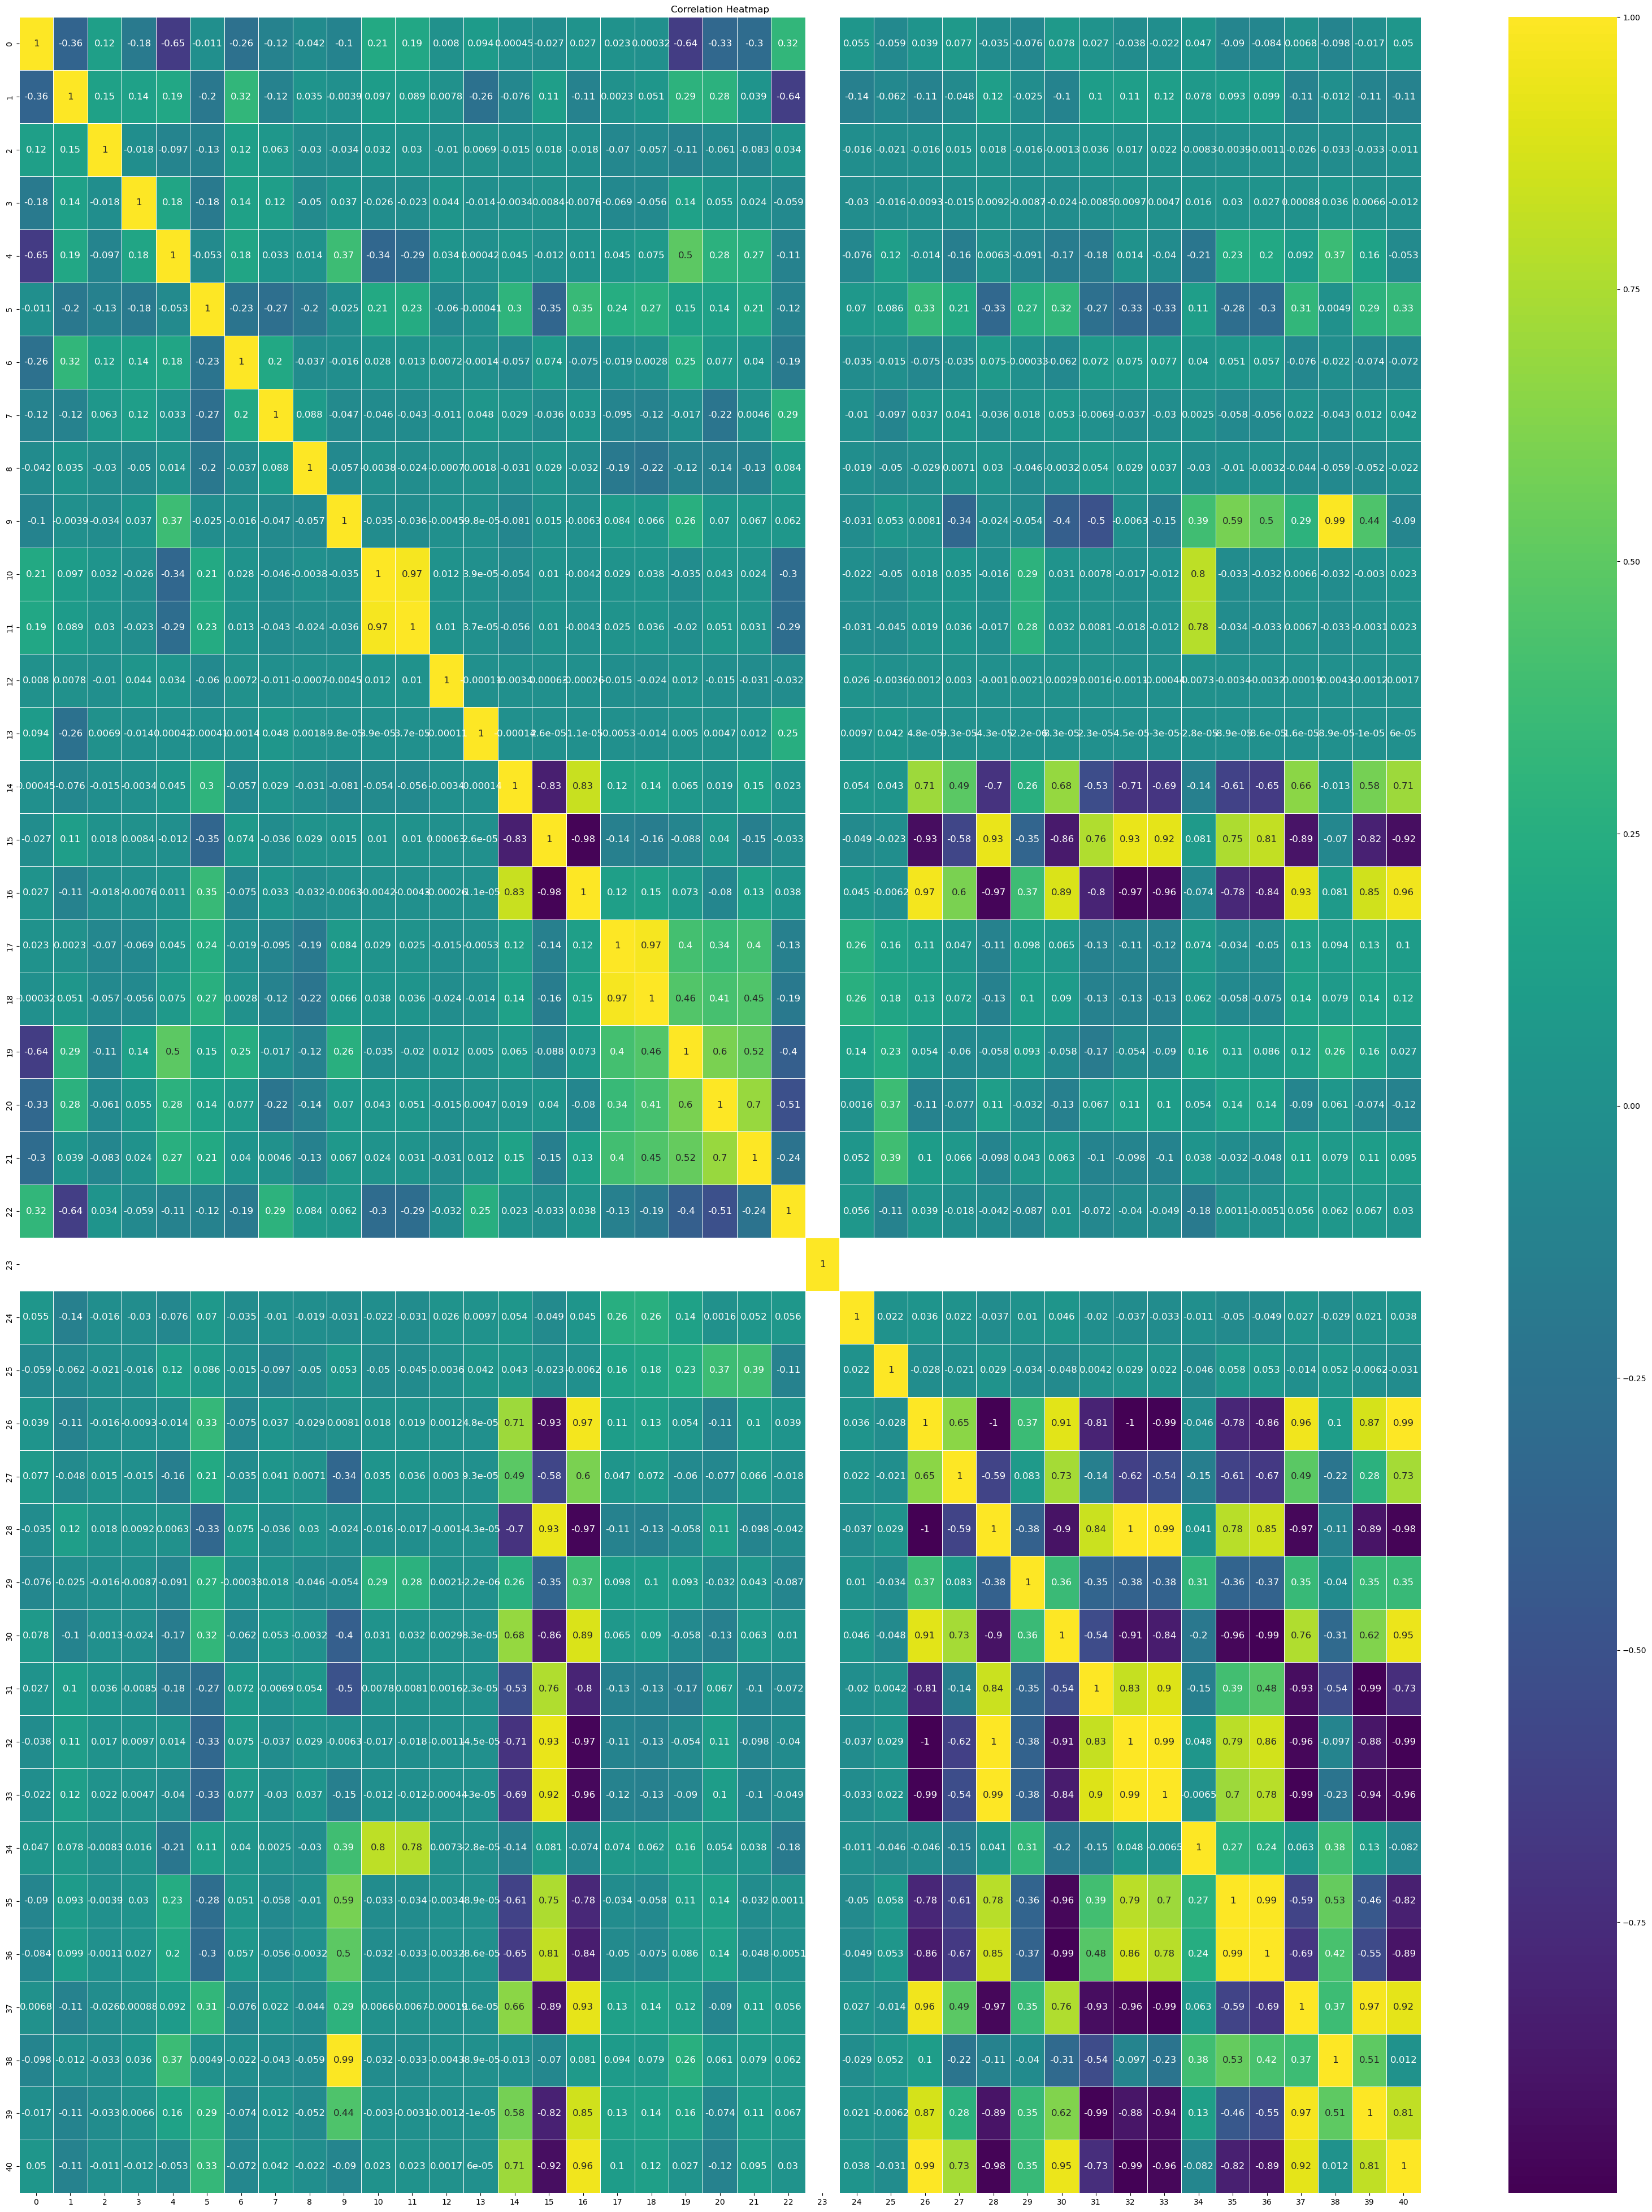

In [ ]:

cov_matrix = numeric_df.corr()

correlation_matrix = cov_matrix.to_numpy().astype(float)
np.fill_diagonal(correlation_matrix, 1.0)


plt.figure(figsize=(40, 50))
sns.heatmap(correlation_matrix,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

plt.title('Correlation Heatmap')
plt.show()